In [2]:
### from pymongo import MongoClient
import pymongo
client = pymongo.MongoClient('192.168.0.164', 27017)
db = client.acorn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

def main():
    while(1):
        selection = input("\n 선택  1)삽입  2) 수정 3) 출력 4) 삭제 5) 데이터로딩 6) 데이터 exporting 9)  종료\n")
        if selection =='1':
            insert()
            continue
        elif selection =='2':
            update()
            continue
        elif selection == '3':
            read()
            continue
        elif selection =='4':
            delete()
            continue
        elif selection =='5':
            mongoimport(db)
            continue
        elif selection =='6':
            write_mongo(db, "sungjuk" )
            continue
            
        elif selection =='9':
            break
        else :
            print("잘못된 선택입니다")

def insert():    
    try:
        num = input("번호입력")
        name = input("이름입력")
        kor = input("국어점수입력 ")
        eng = input("영어점수입력")
        mat = input("수학점수입력")
        db.sungjuk.insert_one(
                {
                        'num' :num,
                        'name' :name,
                        'kor' : kor,
                        'eng' : eng ,
                        'mat' : mat,
                        'tot' : int(kor)+int(eng)+int(mat),
                        'avr' : round((int(kor)+int(eng)+int(mat))/3,1)
                })
        print("데이터가 성공적으로 입력되었습니다. ")
    except Exception as e:
         print(e)
def update():
    try:
        num = input("번호를 입력하시요 ")
        name = input("이름입력")
        kor = input("국어점수입력 ")
        eng = input("영어점수입력")
        mat = input("수학점수입력")
        db.sungjuk.update_one(
                { "num" :num},
                {
                     '$set':{
                            "name":name,
                            "kor":kor,
                            "eng": eng,
                            "mat":mat,
                            "tot" : int(kor)+int(eng)+int(mat),
                            "avr" : round((int(kor)+int(eng)+int(mat))/3,1)
                           }
                }
        )
        print("데이터가 성공적으로 입력되었습니다. ")
    except Exception as e:
        print(e)
def read():
    try:
        sungjukCol = db.sungjuk.find()
        print(" 데이터를 출력합니다")
        for sung in sungjukCol:
            print(sung["num"], sung["name"], sung["kor"], sung["eng"], 
                  sung["mat"] , sung["tot"], sung["avr"])
    except Exception as e:
        print(e)
def delete():
    try:
        num=input("삭제할 번호 입력하세요")
        db.sungjuk.delete_many({"num":num})
        print("데이터가 성공적으로 삭제 되었습니다")
    except Exception as e:
        print(e)
# csv를 mongodb로  ( json으로 변경)       
def mongoimport(db):
    coll = db["sungjuk"]
    data = pd.read_csv("sungjuk_save.csv")
    payload = json.loads(data.to_json(orient='records'))
    # coll.delete_many()# ,첨자를 요구 
    #coll.remove() # deprecate 
    coll.drop() # 테이블 삭제 
    coll.insert_many(payload)
    return coll.count()

# mongodb를 csv로 ( pandas를 이용한 변환 )
def write_mongo(db, collection): # query 를 정리
    cursor = db[collection].find()
    df =  pd.DataFrame(list(cursor))
    del df['_id']
    df.to_csv("sungjuk_save.csv")
    return df       

main()   


 선택  1)삽입  2) 수정 3) 출력 4) 삭제 5) 데이터로딩 6) 데이터 exporting 9)  종료
3
 데이터를 출력합니다

 선택  1)삽입  2) 수정 3) 출력 4) 삭제 5) 데이터로딩 6) 데이터 exporting 9)  종료
3
 데이터를 출력합니다

 선택  1)삽입  2) 수정 3) 출력 4) 삭제 5) 데이터로딩 6) 데이터 exporting 9)  종료
3
 데이터를 출력합니다

 선택  1)삽입  2) 수정 3) 출력 4) 삭제 5) 데이터로딩 6) 데이터 exporting 9)  종료
1
번호입력1
이름입력강호동
국어점수입력 100
영어점수입력100
수학점수입력100
데이터가 성공적으로 입력되었습니다. 

 선택  1)삽입  2) 수정 3) 출력 4) 삭제 5) 데이터로딩 6) 데이터 exporting 9)  종료
3
 데이터를 출력합니다
1 강호동 100 100 100 300 100.0

 선택  1)삽입  2) 수정 3) 출력 4) 삭제 5) 데이터로딩 6) 데이터 exporting 9)  종료
9


In [60]:
%matplotlib inline
import numpy as np
from scipy.misc import imread, imresize
import matplotlib.pyplot as plt
from scipy.misc import face
from skimage.data import coins

img = face()
img

array([[[121, 112, 131],
        [138, 129, 148],
        [153, 144, 165],
        ...,
        [119, 126,  74],
        [131, 136,  82],
        [139, 144,  90]],

       [[ 89,  82, 100],
        [110, 103, 121],
        [130, 122, 143],
        ...,
        [118, 125,  71],
        [134, 141,  87],
        [146, 153,  99]],

       [[ 73,  66,  84],
        [ 94,  87, 105],
        [115, 108, 126],
        ...,
        [117, 126,  71],
        [133, 142,  87],
        [144, 153,  98]],

       ...,

       [[ 87, 106,  76],
        [ 94, 110,  81],
        [107, 124,  92],
        ...,
        [120, 158,  97],
        [119, 157,  96],
        [119, 158,  95]],

       [[ 85, 101,  72],
        [ 95, 111,  82],
        [112, 127,  96],
        ...,
        [121, 157,  96],
        [120, 156,  94],
        [120, 156,  94]],

       [[ 85, 101,  74],
        [ 97, 113,  84],
        [111, 126,  97],
        ...,
        [120, 156,  95],
        [119, 155,  93],
        [118, 154,  92]]

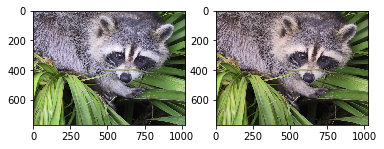

In [61]:
# RGB 출력에 대한 정도를 곱함 (%)
img_tinted = face() * [1, 0.95, 0.9]
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.subplot(1, 2, 2)
plt.imshow(np.uint8(img_tinted))
plt.show()

C:\Users\acorn\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


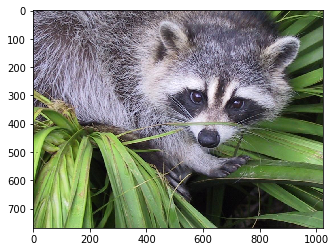

In [68]:
from scipy import misc
f = misc.face()
misc.imsave('face.png', f) # uses the Image module (PIL)

import matplotlib.pyplot as plt
plt.imshow(f)
plt.show()

In [63]:
byte = 768 * 1024 * 3
kilo = byte / 1024
mega = kilo / 1024
print(mega)

2.25


In [67]:
from scipy import misc
face = misc.face()
misc.imsave('face.png', face) # First we need to create the PNG file

face = misc.imread('face.png')
type(face)      

face.shape, face.dtype

C:\Users\acorn\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\acorn\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """


((768, 1024, 3), dtype('uint8'))

In [70]:
#header 파일이 없다.
face.tofile('face.raw') # Create raw file
face_from_raw = np.fromfile('face.raw', dtype=np.uint8)
face_from_raw.shape

face_from_raw.shape = (768, 1024, 3)

In [71]:
face_memmap = np.memmap('face.raw', dtype=np.uint8, shape=(768, 1024, 3))

In [74]:
for i in range(10):
    im = np.random.randint(0, 256, 10000).reshape((100, 100))
    misc.imsave('random_%02d.png' % i, im)
from glob import glob
filelist = glob('random*.png')
filelist.sort()

C:\Users\acorn\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


(768, 1024) uint8


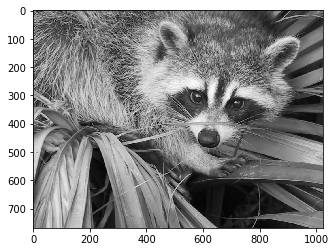

In [75]:
f = misc.face(gray=True)  # retrieve a grayscale image
import matplotlib.pyplot as plt
plt.imshow(f, cmap=plt.cm.gray)        

(-0.5, 1023.5, 767.5, -0.5)

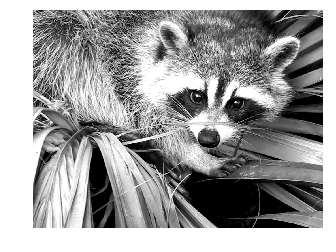

In [76]:
plt.imshow(f, cmap=plt.cm.gray, vmin=30, vmax=200)        

# Remove axes and ticks
plt.axis('off')

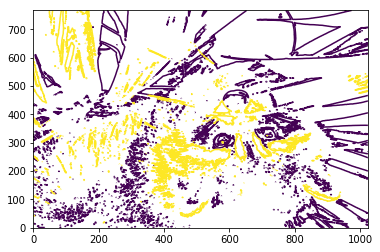

In [77]:
plt.contour(f, [50, 200])

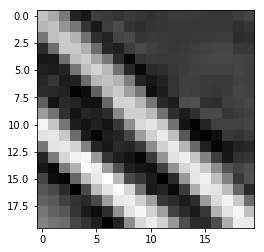

In [78]:
plt.imshow(f[320:340, 510:530], cmap=plt.cm.gray, interpolation='bilinear')        

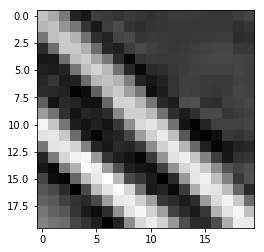

In [79]:
plt.imshow(f[320:340, 510:530], cmap=plt.cm.gray, interpolation='nearest')

In [82]:
face = misc.face(gray=True)
face[0, 40]

# Slicing
face[10:13, 20:23]
face[100:120] = 255

lx, ly = face.shape
X, Y = np.ogrid[0:lx, 0:ly]
# 원
mask = (X - lx / 2) ** 2 + (Y - ly / 2) ** 2 > lx * ly / 4

# Masks
face[mask] = 0

# Fancy indexing
face[range(400), range(400)] = 255

In [91]:
from scipy import ndimage

face = misc.face(gray=True)
lx, ly = face.shape
# Cropping
crop_face = face[lx // 4: - lx // 4, ly // 4: - ly // 4]
# up <-> down flip
flip_ud_face = np.flipud(face)
# rotation
rotate_face = ndimage.rotate(face, 45)
rotate_face_noreshape = ndimage.rotate(face, 45, reshape=False)

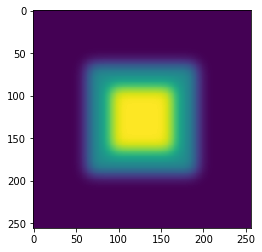

In [98]:
from scipy import misc

face = misc.face(gray=True)

blurred_face = ndimage.gaussian_filter(face, sigma=3)
# very_blurred = ndimage.gaussian_filter(face, sigma=5)

im = np.zeros((256, 256))
im[64:-64, 64:-64] = 1
im[90:-90, 90:-90] = 2

im = ndimage.gaussian_filter(im, 8)

plt.imshow(im)
plt.show()

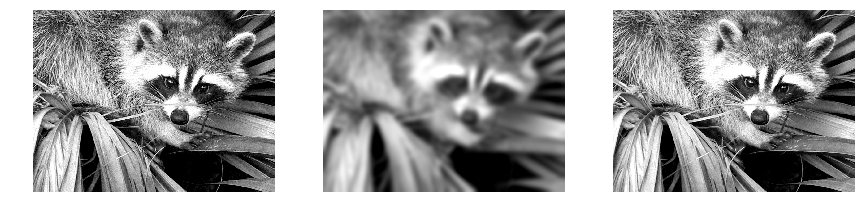

In [101]:
f = misc.face(gray=True)
noisy = f + 0.4 * f.std() * np.random.random(f.shape)
gauss_denoised = ndimage.gaussian_filter(noisy, 10)
med_denoised = ndimage.median_filter(noisy, 2)

plt.figure(figsize=(12, 2.8))

plt.subplot(131)
plt.imshow(noisy,  cmap=plt.cm.gray, vmin=40, vmax=220)
plt.axis('off')

# 가우시안 필터 -> convolution -> 주변 데이터값 * 필터
plt.subplot(132)
plt.imshow(gauss_denoised,  cmap=plt.cm.gray, vmin=40, vmax=220)
plt.axis('off')

plt.subplot(133)
plt.imshow(med_denoised,  cmap=plt.cm.gray, vmin=40, vmax=220)
plt.axis('off')

plt.subplots_adjust(wspace=0.02, hspace=0.02, top=0.9, bottom=0, left=0, right=1)
plt.show()

<class 'PIL.JpegImagePlugin.JpegImageFile'>


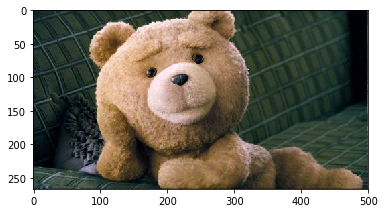

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


float64


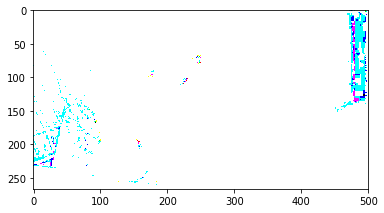

In [103]:
from PIL import Image
img = Image.open("곰.jpeg")
plt.imshow(img)
print(type(img))
plt.show()
image_data = np.array(img).astype(float)
print(image_data.dtype)
plt.imshow(image_data)
plt.show()

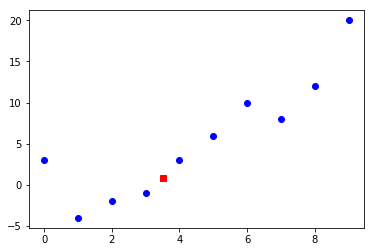

In [112]:
from scipy.interpolate import interp1d

x = np.arange(0, 10)
y = np.array([3.0, -4.0, -2.0, -1.0, 3.0, 6.0, 10.0, 8.0, 12.0, 20.0])

f = interp1d(x, y, kind = 'cubic')
xint = 3.5
yint = f(xint)
plt.plot(x, y, 'o', c='b')
plt.plot(xint, yint, 's', c='r')

plt.show()

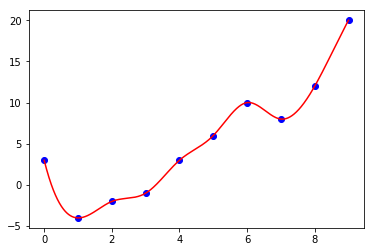

In [113]:
xint = np.arange(0, 9.01, 0.01)
yint = f(xint)
plt.plot(x, y, 'o', c='b')
plt.plot(xint,yint,'-r')

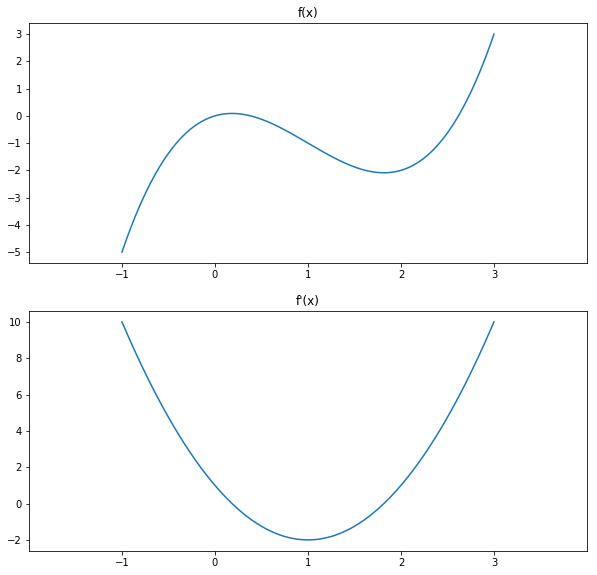

In [119]:
def f(x):
    return x**3 - 3*x**2 + x

def fprime(x):
    return 3*x**2 - 6*x + 1

def fprime2(x):
    return 6*x - 6

x = np.linspace(-1, 3, 400)
plt.figure(figsize=(10,15))
plt.subplot(311)
plt.plot(x, f(x))
plt.xlim(-2,4)
plt.xticks(np.arange(-1,4))
plt.yticks(np.arange(-5,4))
plt.title('f(x)')

plt.subplot(312)
plt.plot(x, fprime(x))
plt.xlim(-2, 4)
plt.xticks(np.arange(-1, 4))
plt.title("f'(x)")

plt.show()

In [120]:
import sympy
sympy.init_printing(use_latex='mathml')
x = sympy.symbols('x')

In [123]:
import numpy as np
from sklearn.decomposition import PCA
X = np.array([[-1, -1, 1], [-2, -1, 3], [-3, -2, -1], [1, 1, 4], [2, 1, -2], [3, 2, 0]])
pca = PCA(n_components = 2)
pca.fit_transform(X)

array([[-1.37906545, -0.19483477],
       [-2.67976926,  1.58289666],
       [-3.05951016, -2.64246656],
       [ 0.57960581,  3.41925753],
       [ 2.83966119, -2.22778121],
       [ 3.69907787,  0.06292835]])

In [124]:
N = 100
a = .5 / N
b = .5 / N

In [126]:
nsteps = 1000
x = np.zeros(nsteps)
x[0] = 25

In [137]:
for t in range(nsteps - 1):
    if 0 < x[t] < N-1:
        birth = np.random.rand() <= a * x[t]
        death = np.random.rand() <= b * x[t]
        x[t+1] = x[t] + 1 * birth - 1 * death
    else:
        x[t+1] = x[t]

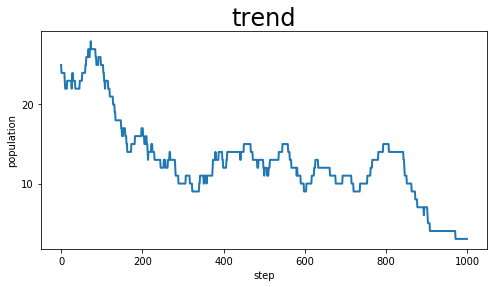

In [131]:
fig, ax = plt.subplots(1, 1, figsize = (8,4))
plt.rcParams["font.size"] = 20
plt.title('trend')
plt.ylabel('population')
plt.xlabel('step')
plt.style.use('seaborn-pastel')
ax.plot(x, lw = 2)

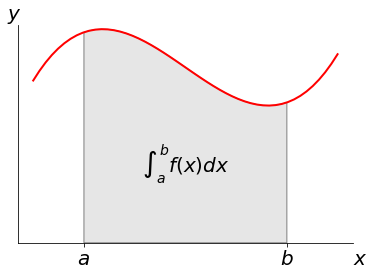

In [138]:
from matplotlib.patches import Polygon

def f(x):
    return x ** 3 - 3 * x ** 2 + x + 6

a, b = 0, 2

x = np.linspace(a - 0.5, b + 0.5, 50)
y = f(x)

ax = plt.subplot(111)

plt.plot(x, y, 'r', linewidth=2)
plt.ylim(ymin=0)

ix = np.linspace(a, b)
iy = f(ix)
verts = [(a, 0)] + list(zip(ix, iy)) + [(b, 0)]
poly = Polygon(verts, facecolor='0.9', edgecolor='0.5')
ax.add_patch(poly)

plt.text(0.5 * (a + b), 0.2 * (f(a) + f(b)), r"$\int_a^b f(x)dx$",
         horizontalalignment='center', fontsize=20)

plt.figtext(0.9, 0.05, '$x$')
plt.figtext(0.1, 0.9, '$y$')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')

ax.set_xticks((a, b))
ax.set_xticklabels(('$a$', '$b$'))
ax.set_yticks([])

plt.show() 

In [146]:
ntrials = 100
x = np.random.randint(size= ntrials, low=0, high=N)

In [147]:
def simulate(x, nsteps):
    for _ in range(nsteps - 1):
        upd = (0 < x) & (x < N - 1)
        birth = 1 * (np.random.rand(ntrials) <= a * x)
        death = 1 * (np.random.rand(ntrials) <= b * x)
        x[upd] += birth[upd] - death[upd]

In [148]:
bins = np.linspace(0, N, 25)

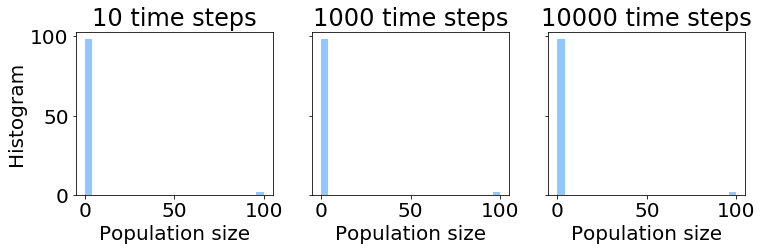

In [152]:
nsteps_list = [10, 1000, 10000]
fig, axes = plt.subplots(1, len(nsteps_list), figsize=(12, 3), sharey=True)

for i, nsteps in enumerate(nsteps_list):
    ax = axes[i]
    simulate(x, nsteps)
    ax.hist(x, bins=bins)
    ax.set_xlabel("Population size")
    if i == 0:
        ax.set_ylabel("Histogram")
    ax.set_title(f"{nsteps} time steps")

In [154]:
name = "Fred"
f"He said his name is {name!r}."

"He said his name is 'Fred'."

In [156]:
# fast fourier transformation (푸리에 변환) : 주파수를 가진 데이터를 다룰 때
# fft: 시감 도메인을 주파수 도메인으로 변환
# sin, cos 함수는 주기함수, - 진폭과 주기로 결정
# ifft: fft의 역
# 신호 처리, 노이즈 처리, 이미지 프로세싱

from scipy.fftpack import fft, ifft
x = np.array([1.0, 2.0, 1.0, -1.0, 1.5])
y = fft(x)

# 복소수: 크기와 방향을 하나의 값으로 가지고 있는 값 실수 + 허수
print(y)

[ 4.5       +0.j          2.08155948-1.65109876j -1.83155948+1.60822041j
 -1.83155948-1.60822041j  2.08155948+1.65109876j]


In [157]:
yinv = ifft(y)
print(yinv)

[ 1. +0.j  2. +0.j  1. +0.j -1. +0.j  1.5+0.j]


In [158]:
import scipy as sp
import scipy.signal as sg
import pandas as pd

In [161]:
nasdaq_df = pd.read_csv('nasdaq.csv', index_col="Date", parse_dates=['Date'])
nasdaq_df.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2013-12-31,4161.51,4177.73,4160.77,4176.59,1401140000,4176.59
2013-12-30,4153.58,4158.73,4142.18,4154.20,1349470000,4154.20
2013-12-27,4173.36,4175.36,4153.64,4156.59,1255020000,4156.59
2013-12-26,4164.21,4169.97,4158.59,4167.18,1180670000,4167.18
2013-12-24,4150.64,4155.62,4147.15,4155.42,802270000,4155.42


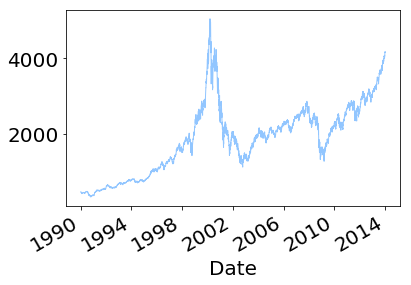

In [162]:
date = nasdaq_df.index
nasdaq = nasdaq_df["Close"]
fig, ax = plt.subplots(1,1, figsize=(6,4))
nasdaq.plot(ax = ax, lw=1)

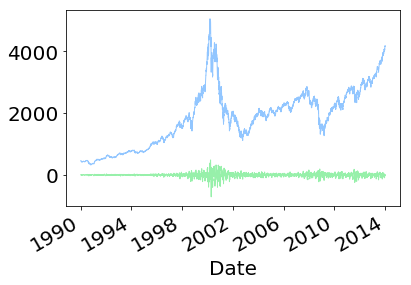

In [165]:
fig, ax = plt.subplots(1, 1, figsize = (6, 4))
nasdaq.plot(ax = ax, lw = 1)
b, a = sg.butter(4, 2 * 5. / 365, btype = 'high')
ax.plot_date(date, sg.filtfilt(b,a,nasdaq), '-', lw = 1)

In [5]:
# mongodb로 job 관리 ( flask )
from flask import Flask, render_template, request, redirect, url_for
from pymongo import MongoClient
from bson.objectid import ObjectId

client = MongoClient('192.168.0.164', 27017)
db = client.camp2016
todos = db.todo
app = Flask(__name__)
title="Flask를 이용한 작업리스트"
heading = "작업 리스트"

#@app.route("/list")
def lists():
    todos_1 = todos.find()
    a1="active"
    return render_template('index.html', a1 = a1, todos=todos_1, t=title, h=heading)

#app.route("/")
#app.route("/uncompleted")

def tasks():
    todos_1 = todos.find({"done":"no"})
    a2 = "active"
    return render_template('index.html', a2 = a2, todos=todos_1, t=title, h=heading)

@app.route("/completed")
def completed():
    todos_1 = todos.find({"done":"yes"})
    a3 = "active"
    return render_template('index.html', a3 = a3, todos=todos_1, t=title, h=heading)

@app.route("/done")
def done():
    id = request.values.get("_id")
    task = todos.find({"_id":ObjectId(id)})
    if(task[0]["done"] == "yes"):
        todos.update({"_id":ObjectId(id)}, {"$set": {"done":"no"}})
    else:
        todos.update({"_id":ObjectId(id)}, {"$set": {"done":"yes"}})
    redir = redirect_url()
    return redirect(redir)
   
@app.route("/action", methods = ["POST"])
def action():
    name = request.values.get("name")
    desc = request.values.get("desc")
    date = request.values.get("date")
    pr = request.values.get("pr")
    todos.inser({"name":name, "desc":desc, "date":date, "pr":pr, "done":"no"})
    return redirect("/list")

@app.route("/remove")
def remove():
    key = request.values.get("_id")
    todos.remove({"_id":ObjectId(key)})
    return redirect("/")

@app.route("/update")
def update():
    id = request.values.get("_id")
    task = todos.find({"_id":ObjectId(id)})
    return render_template("update.html", tasks=task, h=heading, t=title)

@app.route("/action3", methods=['POST'])
def action3():
    name = request.values.get("name")
    desc = request.values.get("desc")
    date = reqiest.values.get("date")
    pr = request.values.get("pr")
    id = request.values.get("_id")
    todos.update({"_id":ObjectId(id)}, {'$set':{"name":name, "desc":desc, "date":date, "pr":pr }})
    return redirect("/")

@app.route("/search", methods=["GET"])
def search():
    key = request.values.get("key")
    refer= request.values.get("refer")
    if (key=="_id"):
        todos_1 = todos.find({refer:ObjectId(key)})
    else:
        todos_1 = todos.find({refer:key})
    return reder_template('searchlist.html', todos=todos_1, t=title, h=heading)